In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from windrose import WindroseAxes
import matplotlib.dates as mdates
sns.set(style="whitegrid")
df = pd.read_csv("../data/raw/sierraleone-bumbuna.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [10]:
print("Summary Statistics:")
print(df.describe())
print("\nMissing Values:")
missing = df.isna().sum()
print(missing)
total_rows = len(df)
print("\nColumns with >5% Missing Values:")
print(missing[missing > 0.05 * total_rows])

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0

In [18]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[key_cols].apply(lambda x: np.abs(stats.zscore(x, nan_policy='omit')))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of rows with outliers (|Z|>3): {outliers.sum()}")
for col in key_cols:
    df[col] = df[col].fillna(df[col].median())
print("\nMissing Values After Imputation:")
print(df[key_cols].isna().sum())
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/sierraleone-bumbuna_clean.csv', index=True)
print("Cleaned DataFrame exported to ../data/processed/sierraleone-bumbuna_clean.csv")

Number of rows with outliers (|Z|>3): 16292

Missing Values After Imputation:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64
Cleaned DataFrame exported to ../data/processed/sierraleone-bumbuna_clean.csv


d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


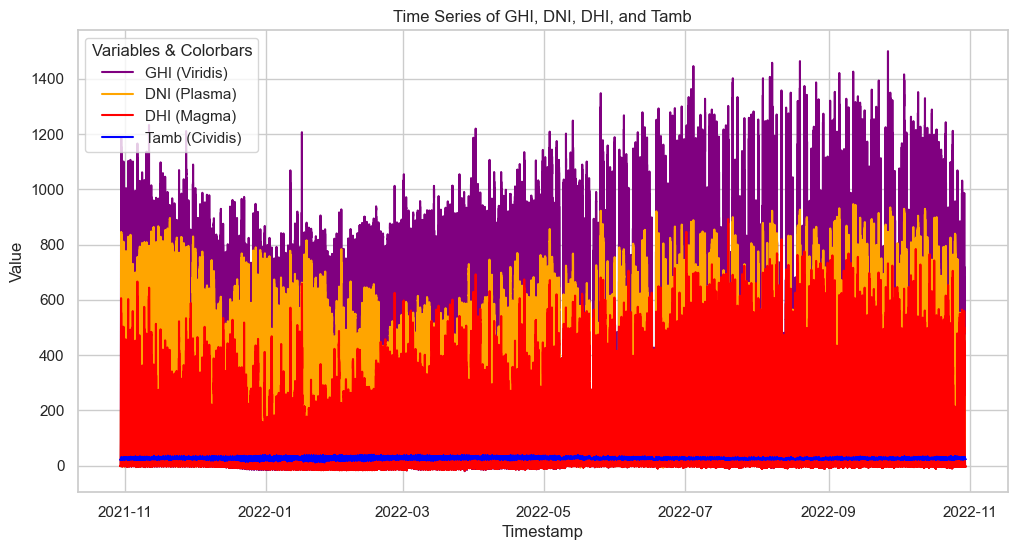

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_19848\644788533.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


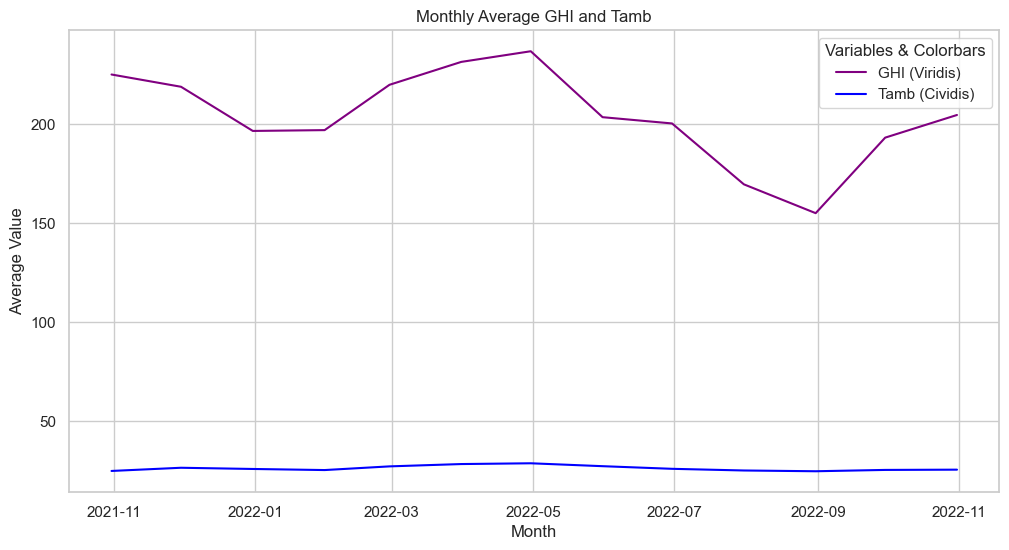

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GHI'], label='GHI (Viridis)', color='purple') 
plt.plot(df.index, df['DNI'], label='DNI (Plasma)', color='orange')  
plt.plot(df.index, df['DHI'], label='DHI (Magma)', color='red')      
plt.plot(df.index, df['Tamb'], label='Tamb (Cividis)', color='blue') 
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.legend(title="Variables & Colorbars")
plt.show()
df_monthly = df.resample('M').mean()
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['GHI'], label='GHI (Viridis)', color='purple')
plt.plot(df_monthly.index, df_monthly['Tamb'], label='Tamb (Cividis)', color='blue')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Monthly Average GHI and Tamb')
plt.legend(title="Variables & Colorbars")
plt.show()

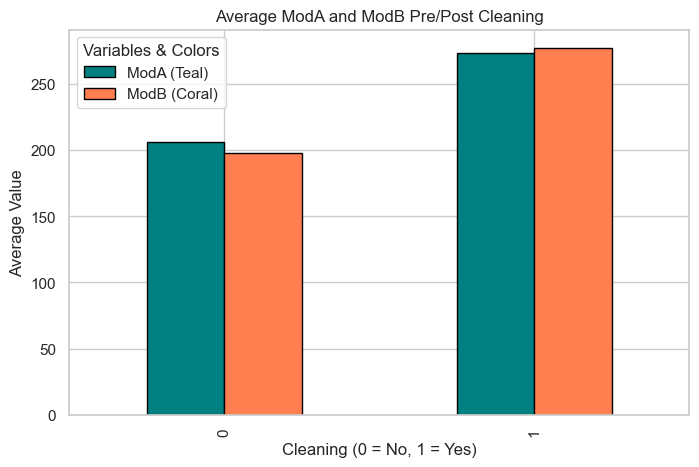

In [13]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
ax = cleaning_impact.plot(kind='bar', figsize=(8, 5), color=['teal', 'coral'], edgecolor='black')
plt.title('Average ModA and ModB Pre/Post Cleaning')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Value')
plt.legend(labels=['ModA (Teal)', 'ModB (Coral)'], title="Variables & Colors")
plt.show()

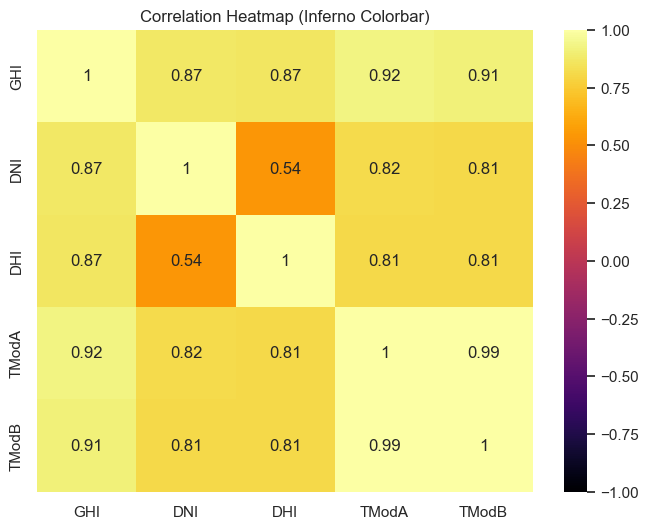

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_19848\3826751099.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


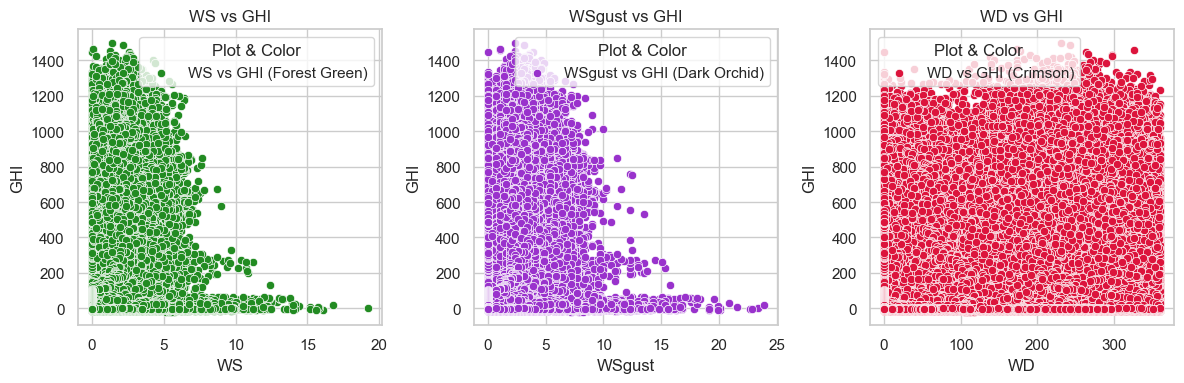

C:\Users\Tinbite\AppData\Local\Temp\ipykernel_19848\3826751099.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
d:\Python_Projects\10academy\solar-challenge-week1\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


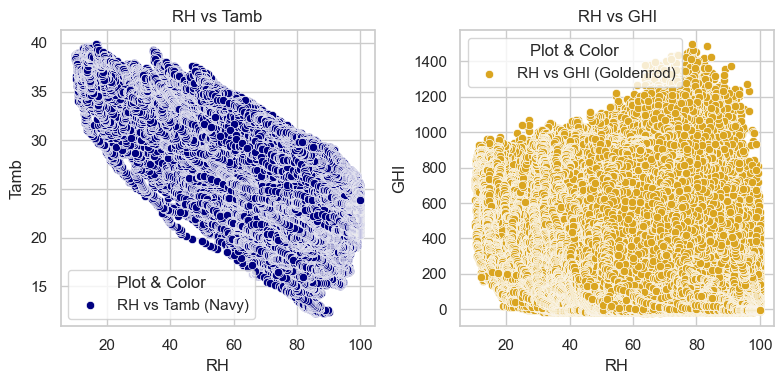

In [14]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(8, 6))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='inferno', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Inferno Colorbar)')
plt.show()
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='WS', y='GHI', data=df, color='forestgreen', label='WS vs GHI (Forest Green)')
plt.legend(title="Plot & Color")
plt.title('WS vs GHI')
plt.subplot(1, 3, 2)
sns.scatterplot(x='WSgust', y='GHI', data=df, color='darkorchid', label='WSgust vs GHI (Dark Orchid)')
plt.legend(title="Plot & Color")
plt.title('WSgust vs GHI')
plt.subplot(1, 3, 3)
sns.scatterplot(x='WD', y='GHI', data=df, color='crimson', label='WD vs GHI (Crimson)')
plt.legend(title="Plot & Color")
plt.title('WD vs GHI')
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='navy', label='RH vs Tamb (Navy)')
plt.legend(title="Plot & Color")
plt.title('RH vs Tamb')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='goldenrod', label='RH vs GHI (Goldenrod)')
plt.legend(title="Plot & Color")
plt.title('RH vs GHI')
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

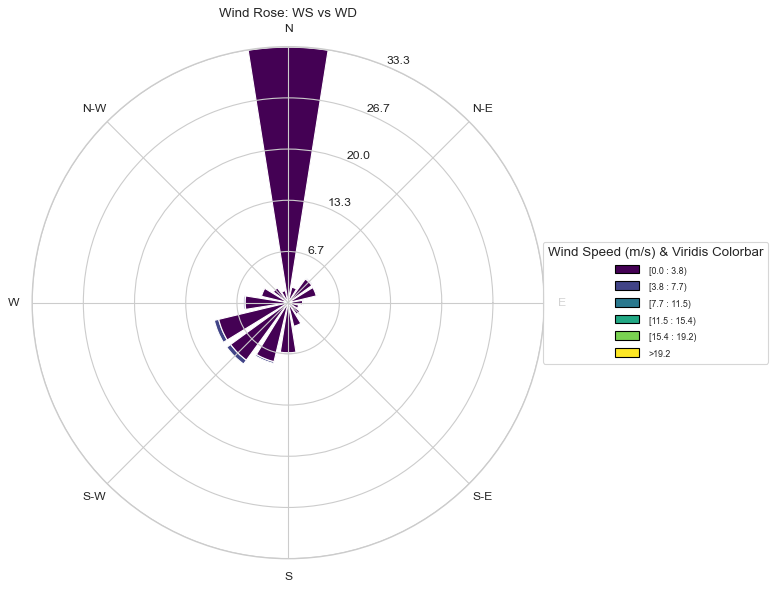

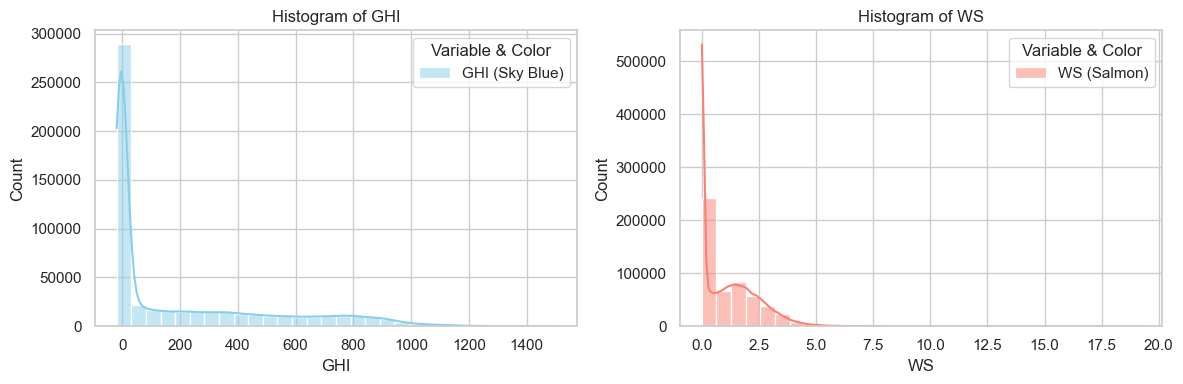

In [15]:
plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white', cmap=plt.cm.viridis)
ax.set_legend(title="Wind Speed (m/s) & Viridis Colorbar", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Wind Rose: WS vs WD')
plt.show()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='skyblue', label='GHI (Sky Blue)')
plt.legend(title="Variable & Color")
plt.title('Histogram of GHI')
plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=30, kde=True, color='salmon', label='WS (Salmon)')
plt.legend(title="Variable & Color")
plt.title('Histogram of WS')
plt.tight_layout()
plt.show()

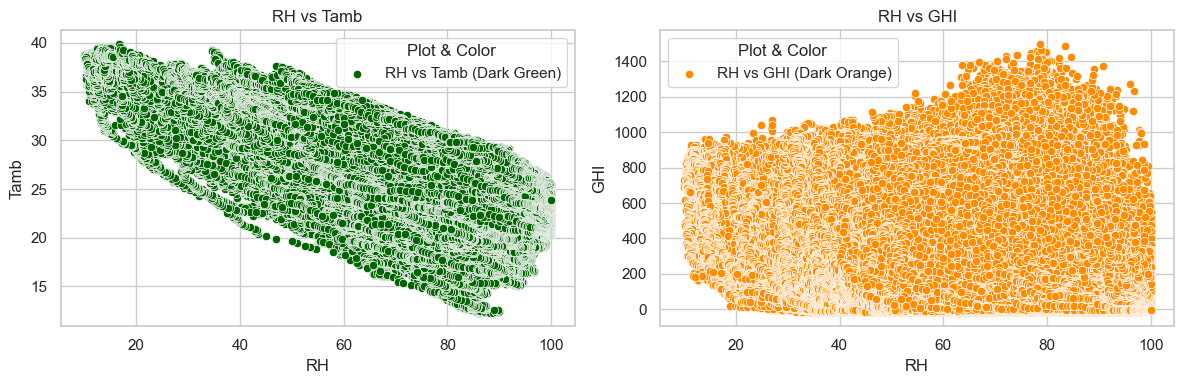

Correlation between RH and Tamb: -0.791936652154722
Correlation between RH and GHI: -0.5466774606671504


In [16]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df, color='darkgreen', label='RH vs Tamb (Dark Green)')
plt.legend(title="Plot & Color")
plt.title('RH vs Tamb')
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df, color='darkorange', label='RH vs GHI (Dark Orange)')
plt.legend(title="Plot & Color")
plt.title('RH vs GHI')
plt.tight_layout()
plt.show()
print("Correlation between RH and Tamb:", df['RH'].corr(df['Tamb']))
print("Correlation between RH and GHI:", df['RH'].corr(df['GHI']))

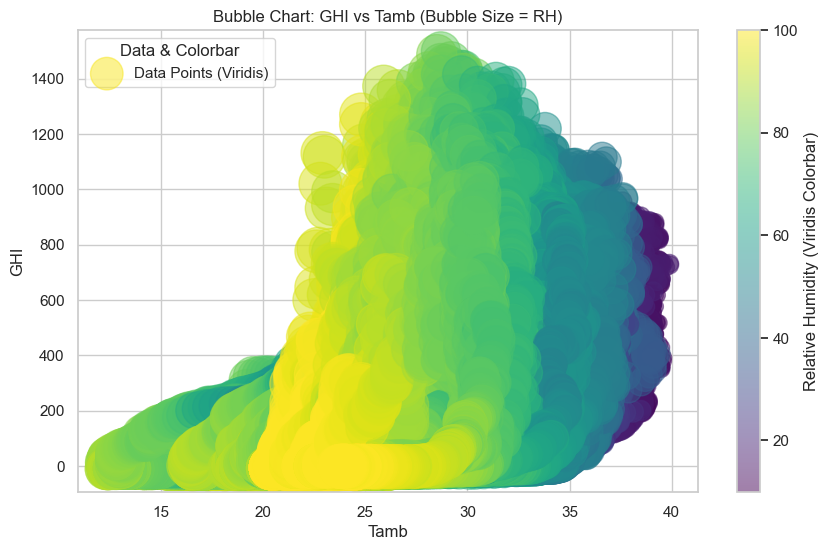

In [17]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5, c=df['RH'], cmap='viridis')
plt.colorbar(scatter, label='Relative Humidity (Viridis Colorbar)')
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.legend(labels=['Data Points (Viridis)'], title="Data & Colorbar")
plt.show()